## Linear Regression

Linear regression is used to predict the outcome based on a linear set of input. The simplest hypothesis function of is a univariate function as shown in the equation below:

$$
h_0  = θ_0 + θ_1x_1
$$

As you can guess this function represents a linear line in the coordinate system. Hypothesis function (h<sub>0</sub>) approximates the output given input.
θ<sub>0</sub> is the `intercept`, also called `bias term`. θ<sub>1</sub> is the `gradient` or `slope`.

A Linear Regression model can either represent a univariate or a multivariate problem. So if we generalize the equation of the hypothesis as summation:

$$
h_0 = \sum{θ_ix_i}
$$

x<sub>0</sub> is always 1.

We can also represent the hypothesis equation with vector notation:

$$
h_0 =
\begin{bmatrix}
θ_0 & θ_1 & θ_2 \dots θ_n
\end{bmatrix} 
x
\begin{bmatrix}
           x_0 \\
           x_1 \\
           x_2 \\
           \vdots \\
           x_n
         \end{bmatrix}
$$

which helps to separate the variable and parameter vectors.

### Linear Regression Model

I am going to introduce Linear Regression model using `Gradient Descent` algorithm.

Each iteration of a Gradient Descent algorithm calculates the following steps

* Hypothesis h
* The loss
* Gradient descent update

The gradient descent update iteration stops when it reaches the `convergence`.


#### Hypothesis

In [148]:
import numpy as np


In [149]:
def hypothesis(X, theta):
    """Calculates the linear regression hypothesis

    parameters
    ----------
    X : numpy.ndarray
        Input data vector
    theta : numpy.ndarray
        Parameter vector
    """

    return theta[0] + theta[1:] * X


We start the initial hypothesis assumption with random parameters. Then we calculate the loss using `L2 Loss` function over the training dataset.

#### L2 Loss

L2 Loss function calculates the least squared error (loss).

$$
L2 = J(θ) = \frac{\sum{(h_i - y_i)^2}}{m}
$$

In [150]:
def L2_loss(h, y):
    """h is the hypothesis vector having the predicted values.
    """
    return np.mean([ (a - b) ** 2 for a, b in zip(h.flatten(), y)])

#loss_L2(h_lin(X_test,[150, 958]), y_test)


#### Gradients of the Loss

Gradients of the loss is the partial derivatives of θ. We calculate partial differential of loss for θ<sub>0</sub> and θ<sub>1</sub> separately. For multivariat functions our θ<sub>1</sub> is a generalized version for all available θ<sub>j</sub> since the partial derivatives are calculated similarly. You can simply calculate the partial derivatives of loss function yourself too.

$$
\frac{∂}{∂θ_0}J(θ_0) = \frac{\sum{(h_0 - y_0)}}{m}
$$

$$
\frac{∂}{∂θ_0}J(θ_i) = \frac{\sum{(h_i - y_i)x_i}}{m}
$$

Since we know the hypothesis equation we can replace it in the derivatives as well.


In [151]:
def partial_derivatives(h, X, y):
    """Calculate partial derivatives for given hypothesis, X and y
    """

    return [np.mean((h.flatten() - y)), np.mean((h.flatten() - y) * X.flatten())]


We calculate the partial derivatives for given theta, X and y:

In [152]:
def calc_gradients(theta, X, y):
    """Calculate gradients given theta, X, y
    """

    gradient = [0, 0]

    h = hypothesis(X, theta)
    gradient = partial_derivatives(h, X, y)
    return np.array(gradient)

    


#### Gradient update



Now we are going to iterate through gradient descent batch update. We have a alpha and stop threshold that we take into account here. I'm going to tell about them later.

In [153]:
def gradient_update(X, y, theta, alpha, stop_threshold):
    # initial loss

    loss = L2_loss(hypothesis(X,theta), y)
    old_loss = loss + stop_threshold

    while( abs(old_loss - loss) > stop_threshold ):
        # gradient descent update
        gradients = calc_gradients(theta, X, y)
        theta = theta - alpha * gradients            
        old_loss = loss
        loss = L2_loss(hypothesis(X,theta), y)
        
    print('Gradient Descent training stopped at loss %s, with coefficients: %s' % (loss, theta))
    return theta



### Evaluation

We created training algorithm of our Linear Regression model. We can now train and test against some regression datasets. Among `SK-Learn` toy datasets `diabetes` is a regression dataset we can use here.

In [154]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.1)


#### My Linear Regression model evaluation

Gradient Descent training stopped at loss 3954.6853409792534, with coefficients: [153.65664016 820.38385773]
Intercept (theta 0): 
 153.65664016384486
Coefficients (theta 1): 
 820.3838577278237
MSE:  3716.698595343569
R2 Score 0.26421621718823773


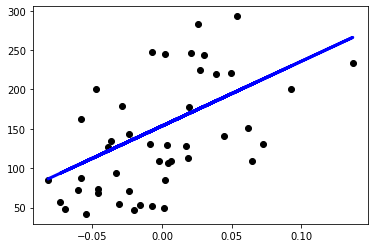

In [155]:
# initial theta
theta = [100, 3]

stop_threshold = 0.1

# learning rate
alpha = 0.5

theta = gradient_update(X_train, y_train, theta, alpha, stop_threshold)
y_pred =  hypothesis(X_test, theta)

print('Intercept (theta 0): \n', theta[0])
print('Coefficients (theta 1): \n', theta[1])
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2 Score", r2_score(y_test, y_pred))

# Plot outputs using test data
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()


#### Sci-Kit Learn LinearRegression model evaluation

Now let's evaluate Sci-Kit Learn LinearRegression model and compare the results.

Coef:  [959.29828463]
Intercept:  153.63127419766417
MSE:  3734.8709511128773
R2 Score 0.26061868988610615


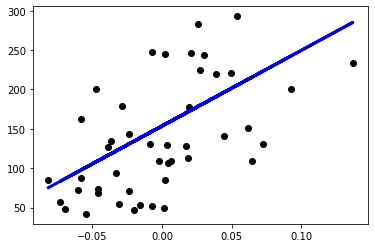

In [156]:
# Sci-Kit Learn LinearRegression model evaluation

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print("Coef: ", regr.coef_)
print("Intercept: ", regr.intercept_)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2 Score", r2_score(y_test, y_pred))
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()
